In [15]:
import ll

ll.pretty()

TensorBoard/TensorBoardX not found. Disabling TensorBoardLogger. Please install TensorBoard with `pip install tensorboard` or TensorBoardX with `pip install tensorboardx` to enable TensorBoard logging.


In [9]:
import datasets

dataset_full = datasets.load_dataset(
    "nimashoghi/mptrj",
    # verification_mode="no_checks",
    # streaming=True,
)
dataset_full

Generating train split:   0%|          | 0/1559916 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/10206 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10273 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['numbers', 'positions', 'forces', 'cell', 'pbc', 'energy', 'stress', 'e_per_atom_relaxed', 'mp_id', 'energy_per_atom', 'ef_per_atom_relaxed', 'corrected_total_energy', 'ef_per_atom', 'task_id', 'calc_id', 'ionic_step', 'filename', 'extxyz_id', 'num_atoms'],
        num_rows: 1559916
    })
    val: Dataset({
        features: ['numbers', 'positions', 'forces', 'cell', 'pbc', 'energy', 'stress', 'e_per_atom_relaxed', 'mp_id', 'energy_per_atom', 'ef_per_atom_relaxed', 'corrected_total_energy', 'ef_per_atom', 'task_id', 'calc_id', 'ionic_step', 'filename', 'extxyz_id', 'num_atoms'],
        num_rows: 10206
    })
    test: Dataset({
        features: ['numbers', 'positions', 'forces', 'cell', 'pbc', 'energy', 'stress', 'e_per_atom_relaxed', 'mp_id', 'energy_per_atom', 'ef_per_atom_relaxed', 'corrected_total_energy', 'ef_per_atom', 'task_id', 'calc_id', 'ionic_step', 'filename', 'extxyz_id', 'num_atoms'],
        num_rows: 10273
    })


In [24]:
import rich


d = dataset_full["train"].with_format("torch")

rich.print(d[0])
d.num_atoms = d["num_atoms"].numpy()
d.num_atoms

{
    'numbers': tensor[14] i64 x∈[34, 50] μ=37.643 σ=4.924,
    'positions': tensor[14, 3] n=42 x∈[-8.960, 1.614] μ=-2.795 σ=2.779,
    'forces': tensor[14, 3] n=42 x∈[-1.084, 1.084] μ=-2.838e-09 σ=0.456,
    'cell': tensor[3, 3] n=9 x∈[-9.861, 2.515] μ=-2.048 σ=4.511 [[0., -3.429, 1.000e-08], [-9.064, 1.714, 2.515], 
[-0.308, 2.000e-08, -9.861]],
    'pbc': tensor[3] bool x∈[True, True] μ=1.000 σ=0. [True, True, True],
    'energy': tensor -91.338,
    'stress': tensor[3, 3] n=9 x∈[-0.013, 0.010] μ=7.731e-05 σ=0.007 [[-0.002, 1.248e-10, 0.010], [1.248e-10, 
-0.004, -5.305e-10], [0.010, -5.305e-10, -0.013]],
    'e_per_atom_relaxed': tensor -6.888,
    'mp_id': 'mp-1104829',
    'energy_per_atom': tensor -6.794,
    'ef_per_atom_relaxed': tensor -6.888,
    'corrected_total_energy': tensor -95.114,
    'ef_per_atom': tensor -0.903,
    'task_id': 'mp-1104829',
    'calc_id': tensor i64 1,
    'ionic_step': tensor i64 3,
    'filename': 'mp-1104829',
    'extxyz_id': tensor i64 24,
    'num_atoms': tensor i64 14
}

array[1559916] i64 12Mb x∈[1, 444] μ=31.193 σ=29.575

In [8]:
datasets.load_dataset(
    "nimashoghi/oc20-s2ef",
    verification_mode="no_checks",
    streaming=True,
)["2M"].features

{'sid': Value(dtype='string', id=None),
 'fid': Value(dtype='string', id=None),
 'reference_energy': Value(dtype='float64', id=None),
 'num_atoms': Value(dtype='int64', id=None),
 'atomic_numbers': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'pos': Sequence(feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), length=-1, id=None),
 'energy': Value(dtype='float64', id=None),
 'forces': Sequence(feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None), length=-1, id=None),
 'cell': Array2D(shape=(3, 3), dtype='float32', id=None),
 'fixed': Sequence(feature=Value(dtype='bool', id=None), length=-1, id=None),
 'tags': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None)}

In [32]:
d = dataset_full["train"].with_format("numpy")
rich.print(d.features)

{
    'numbers': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
    'positions': Sequence(
        feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None),
        length=-1,
        id=None
    ),
    'forces': Sequence(
        feature=Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None),
        length=-1,
        id=None
    ),
    'cell': Array2D(shape=(3, 3), dtype='float32', id=None),
    'pbc': Sequence(feature=Value(dtype='bool', id=None), length=-1, id=None),
    'energy': Value(dtype='float32', id=None),
    'stress': Array2D(shape=(3, 3), dtype='float32', id=None),
    'e_per_atom_relaxed': Value(dtype='float32', id=None),
    'mp_id': Value(dtype='string', id=None),
    'energy_per_atom': Value(dtype='float32', id=None),
    'ef_per_atom_relaxed': Value(dtype='float32', id=None),
    'corrected_total_energy': Value(dtype='float32', id=None),
    'ef_per_atom': Value(dtype='float32', id=None),
    'task_id': Value(dtype='string', id=None),
    'calc_id': Value(dtype='int64', id=None),
    'ionic_step': Value(dtype='int64', id=None),
    'filename': Value(dtype='string', id=None),
    'extxyz_id': Value(dtype='int64', id=None),
    'num_atoms': Value(dtype='int64', id=None)
}

In [39]:
import pandas as pd


df = pd.read_json("/mnt/datasets/matbench-discovery-traj/megnet-133k.json")
df

,structure_id,positions,cell,atomic_numbers,energy,y,stress,forces
0,mp-770503-0-2,"[[-7.122789774563877, -5.048264316828707, -4.9...","[[-7.8013173, -4.50105389, 0.00836265000000000...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",-585.579917,-585.579917,"[[[0.000167021485974, -0.00013598156231400002,...","[[0.05488963, 0.040321130000000004, 0.00015947..."
1,mp-770503-1-0,"[[-7.092490665893987, -5.033007204845125, -4.9...","[[-7.7606371, -4.47912837, -0.00198596], [-2.5...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",-585.295617,-585.295617,"[[[-0.011510691830462001, -0.000249249998293, ...","[[0.0636803, 0.02808716, 0.017273610000000002]..."
2,mp-770503-1-2,"[[-7.112740627570031, -5.0442725147542, -4.975...","[[-7.7858518199999995, -4.49279932, 0.00289702...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",-585.474111,-585.474111,"[[[-0.004551843114748, -0.000487820574743, 0.0...","[[0.05757644, 0.04383206, 0.00396587], [-0.082..."
3,mp-770840-0-2,"[[1.473155175, 0.9019634041674981, 0.658619789...","[[2.94631035, -5.19398904, -0.1357224], [2.946...","[3, 3, 23, 23, 31, 31, 8, 8, 8, 8, 8, 8, 8, 8]",-91.977830,-91.977830,"[[[-0.005387615171721, -0.0, -0.0], [-0.0, -0....","[[0.0, 0.08051365, 0.05879162], [0.0, -0.08051..."
4,mp-770840-1-0,"[[1.441250665, 0.876922092454337, 0.6403344543...","[[2.88250133, -5.17889585, -0.0928662300000000...","[3, 3, 23, 23, 31, 31, 8, 8, 8, 8, 8, 8, 8, 8]",-91.857566,-91.857566,"[[[-0.042385308640998, -0.0, -0.0], [-0.0, -0....","[[0.0, 0.08401638, 0.06134933], [0.0, -0.08401..."
...,...,...,...,...,...,...,...,...
187682,mvc-3920-1-0,"[[3.749999866187181e-09, 6.453198907499999, -2...","[[9.93534927, 0.0, -3.51267677], [-4.96767463,...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...",-566.215143,-566.215143,"[[[0.0047802886901290005, -0.0, -1.62279237272...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ..."
187683,mvc-3920-1-1,"[[0.0, 6.4364407425, -2.62766620875], [0.0, 2....","[[9.90954838, 0.0, -3.50355478], [-4.95477419,...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...",-566.239913,-566.239913,"[[[-0.005338404198988, -0.0, 1.747622555247312...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ..."
187684,mp-1186-0-1,"[[1.8454599717879332, 1.065476792678565, 5.154...","[[3.69091991, 0.0, 0.0], [-1.84545996, 3.19643...","[16, 16, 40]",-21.359857,-21.359857,"[[[-2.3152054223259324e-05, -0.0, -0.0], [-0.0...","[[0.0, 0.0, -9.375e-05], [0.0, 0.0, 9.375e-05]..."
187685,mp-1186-1-0,"[[1.8400000184, 1.0623244860434211, 4.38749999...","[[3.68, 0.0, 0.0], [-1.8399999999999999, 3.186...","[16, 16, 40]",-21.322418,-21.322418,"[[[-0.002906930702605, -0.0, -0.0], [-0.0, -0....","[[0.0, 0.0, 0.09422701], [0.0, 0.0, -0.0942270..."


In [43]:
df["num_atoms"] = df["atomic_numbers"].apply(len)
df

,structure_id,positions,cell,atomic_numbers,energy,y,stress,forces,num_atoms
0,mp-770503-0-2,"[[-7.122789774563877, -5.048264316828707, -4.9...","[[-7.8013173, -4.50105389, 0.00836265000000000...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",-585.579917,-585.579917,"[[[0.000167021485974, -0.00013598156231400002,...","[[0.05488963, 0.040321130000000004, 0.00015947...",84
1,mp-770503-1-0,"[[-7.092490665893987, -5.033007204845125, -4.9...","[[-7.7606371, -4.47912837, -0.00198596], [-2.5...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",-585.295617,-585.295617,"[[[-0.011510691830462001, -0.000249249998293, ...","[[0.0636803, 0.02808716, 0.017273610000000002]...",84
2,mp-770503-1-2,"[[-7.112740627570031, -5.0442725147542, -4.975...","[[-7.7858518199999995, -4.49279932, 0.00289702...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",-585.474111,-585.474111,"[[[-0.004551843114748, -0.000487820574743, 0.0...","[[0.05757644, 0.04383206, 0.00396587], [-0.082...",84
3,mp-770840-0-2,"[[1.473155175, 0.9019634041674981, 0.658619789...","[[2.94631035, -5.19398904, -0.1357224], [2.946...","[3, 3, 23, 23, 31, 31, 8, 8, 8, 8, 8, 8, 8, 8]",-91.977830,-91.977830,"[[[-0.005387615171721, -0.0, -0.0], [-0.0, -0....","[[0.0, 0.08051365, 0.05879162], [0.0, -0.08051...",14
4,mp-770840-1-0,"[[1.441250665, 0.876922092454337, 0.6403344543...","[[2.88250133, -5.17889585, -0.0928662300000000...","[3, 3, 23, 23, 31, 31, 8, 8, 8, 8, 8, 8, 8, 8]",-91.857566,-91.857566,"[[[-0.042385308640998, -0.0, -0.0], [-0.0, -0....","[[0.0, 0.08401638, 0.06134933], [0.0, -0.08401...",14
...,...,...,...,...,...,...,...,...,...
187682,mvc-3920-1-0,"[[3.749999866187181e-09, 6.453198907499999, -2...","[[9.93534927, 0.0, -3.51267677], [-4.96767463,...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...",-566.215143,-566.215143,"[[[0.0047802886901290005, -0.0, -1.62279237272...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",80
187683,mvc-3920-1-1,"[[0.0, 6.4364407425, -2.62766620875], [0.0, 2....","[[9.90954838, 0.0, -3.50355478], [-4.95477419,...","[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 2...",-566.239913,-566.239913,"[[[-0.005338404198988, -0.0, 1.747622555247312...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...",80
187684,mp-1186-0-1,"[[1.8454599717879332, 1.065476792678565, 5.154...","[[3.69091991, 0.0, 0.0], [-1.84545996, 3.19643...","[16, 16, 40]",-21.359857,-21.359857,"[[[-2.3152054223259324e-05, -0.0, -0.0], [-0.0...","[[0.0, 0.0, -9.375e-05], [0.0, 0.0, 9.375e-05]...",3
187685,mp-1186-1-0,"[[1.8400000184, 1.0623244860434211, 4.38749999...","[[3.68, 0.0, 0.0], [-1.8399999999999999, 3.186...","[16, 16, 40]",-21.322418,-21.322418,"[[[-0.002906930702605, -0.0, -0.0], [-0.0, -0....","[[0.0, 0.0, 0.09422701], [0.0, 0.0, -0.0942270...",3


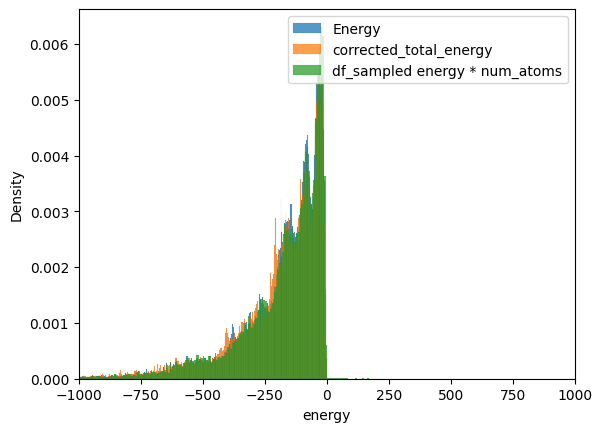

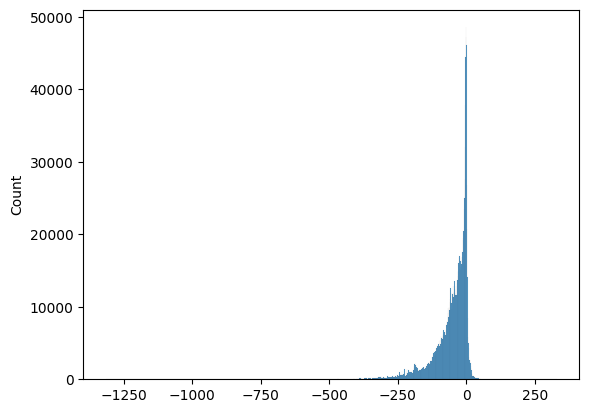

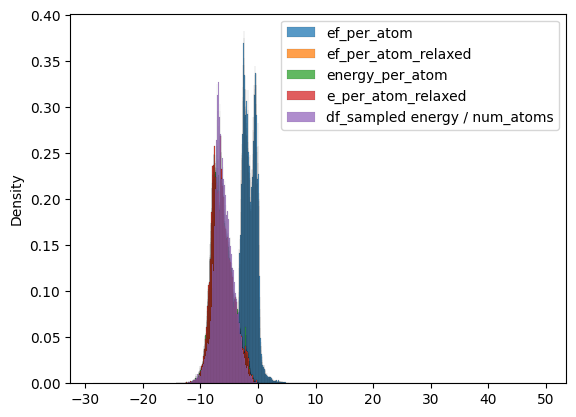

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


# label as "Energy"
fig, ax = plt.subplots()
sns.histplot(d["energy"], label="Energy", ax=ax, stat="density")
sns.histplot(
    d["corrected_total_energy"], label="corrected_total_energy", ax=ax, stat="density"
)
sns.histplot(df["energy"], label="df_sampled energy * num_atoms", ax=ax, stat="density")

ax.set_xlim(-1000, 1000)
plt.legend()
plt.show()


sns.histplot(d["ef_per_atom"] * d["num_atoms"])
plt.show()

fig, ax = plt.subplots()
sns.histplot(d["ef_per_atom"], label="ef_per_atom", ax=ax, stat="density")
sns.histplot(
    d["ef_per_atom_relaxed"], label="ef_per_atom_relaxed", ax=ax, stat="density"
)
sns.histplot(d["energy_per_atom"], label="energy_per_atom", ax=ax, stat="density")
sns.histplot(d["e_per_atom_relaxed"], label="e_per_atom_relaxed", ax=ax, stat="density")
sns.histplot(
    df["energy"] / df["num_atoms"],
    label="df_sampled energy / num_atoms",
    ax=ax,
    stat="density",
)
plt.legend()
plt.show()